# Analyzing Credit Card Data with K means Clustering
## An Excercise in Unsupervised Machine Learning

In [55]:
# Import starting libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

##### Data can be found at https://www.kaggle.com/arjunbhasin2013/ccdata

In [16]:
credit = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/CC GENERAL.csv')
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [11]:
# Check for null values
credit.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
# Drop null values
credit = credit.dropna()

In [57]:
del credit['CUST_ID']

In [59]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8636 non-null float64
BALANCE_FREQUENCY                   8636 non-null float64
PURCHASES                           8636 non-null float64
ONEOFF_PURCHASES                    8636 non-null float64
INSTALLMENTS_PURCHASES              8636 non-null float64
CASH_ADVANCE                        8636 non-null float64
PURCHASES_FREQUENCY                 8636 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8636 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8636 non-null float64
CASH_ADVANCE_FREQUENCY              8636 non-null float64
CASH_ADVANCE_TRX                    8636 non-null int64
PURCHASES_TRX                       8636 non-null int64
CREDIT_LIMIT                        8636 non-null float64
PAYMENTS                            8636 non-null float64
MINIMUM_PAYMENTS                    8636 non-null float64
PRC_FULL_PAYMENT           

In [73]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Exploratory Analysis

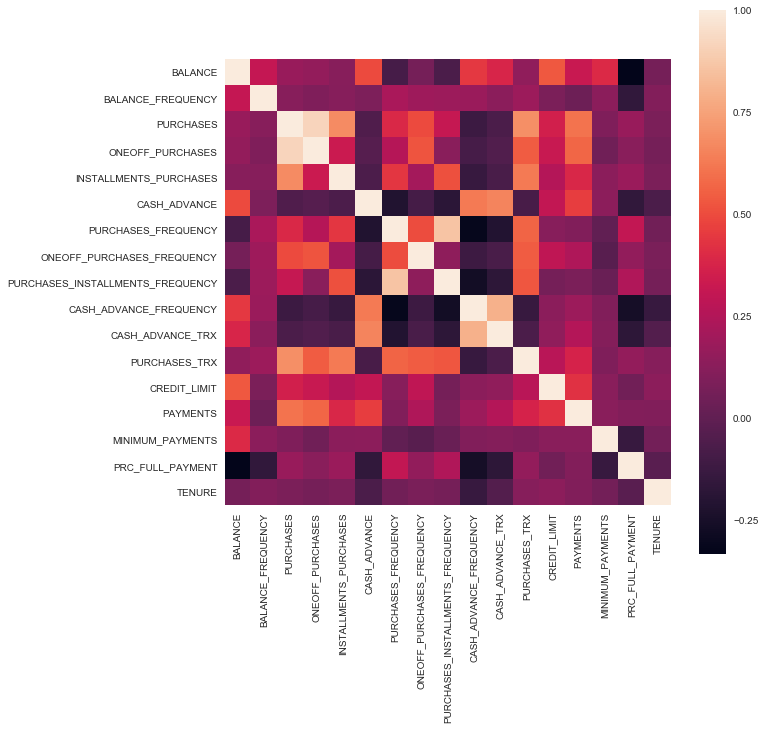

In [80]:
# Heat map of the correlation of the input variables of the data set
fig, ax = plt.subplots(figsize=(10,10))
correlation = credit.corr() 
sns.heatmap(correlation, square = True) 

In [104]:
credit.groupby('TENURE').std().head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
TENURE,,,,,,,,,,,,,,,,
6,1737.368160,0.189991,904.860712,664.740878,418.987195,2264.081989,0.412877,0.250175,0.366850,0.291026,6.105550,9.594926,2997.783865,1701.621559,698.520472,0.373369
7,1284.884672,0.199538,700.459633,578.486705,325.404746,2259.305464,0.397139,0.210840,0.358529,0.247603,5.259649,10.247903,2463.114773,2030.217134,709.303585,0.281826
8,1758.308688,0.215433,778.126415,716.207227,315.464687,2160.117254,0.398640,0.234111,0.362070,0.250103,7.600054,9.385404,2939.794025,1324.269024,577.589639,0.309982
9,1539.204988,0.200350,841.527079,680.373400,472.911461,2114.431074,0.397157,0.209227,0.368528,0.240142,8.167104,8.991897,2667.796508,1345.085124,1096.401486,0.318632
10,1654.952525,0.239462,1935.855564,1181.560037,871.329612,2327.828323,0.379447,0.222716,0.341830,0.236434,6.945339,11.534982,3926.868368,2084.380955,539.411027,0.326609


In [103]:
credit.groupby('TENURE').sum().head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
TENURE,,,,,,,,,,,,,,,,
6,214195.979363,152.333321,83903.68,49094.08,34839.60,277957.205993,88.833330,26.333338,58.666657,45.666677,716,1094,553120.000000,129329.319676,62935.663702,43.350000
7,186980.054060,149.285730,79320.20,45587.55,33732.65,236978.085721,78.428576,22.857139,52.857151,40.285698,675,1052,455950.000000,150674.734896,72740.687306,25.719046
8,217520.786983,150.500000,88378.32,56540.17,31838.15,259760.544593,78.625000,26.875000,53.500000,36.125000,787,1217,552250.000000,164710.917362,78352.704663,30.202381
9,191934.736253,135.222234,92789.85,51516.29,41543.56,253562.355129,69.888889,18.444438,51.222228,35.333322,787,1131,497583.333333,166688.953182,89576.221722,29.711109
10,294581.244405,185.000000,155904.02,93374.48,62576.54,306517.695607,89.400000,32.900000,60.000000,42.500000,955,1818,880500.000000,264210.141590,105909.623771,39.977381


In [102]:
credit.groupby('TENURE').mean().head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
TENURE,,,,,,,,,,,,,,,,
6,1164.108583,0.827898,455.998261,266.815652,189.345652,1510.636989,0.482790,0.143116,0.318841,0.248188,3.891304,5.945652,3006.086957,702.876737,342.041651,0.235598
7,1056.384486,0.843422,448.136723,257.556780,190.579944,1338.859241,0.443099,0.129136,0.298628,0.227603,3.813559,5.943503,2575.988701,851.269689,410.964335,0.145305
8,1188.638180,0.822404,482.941639,308.962678,173.978962,1419.456528,0.429645,0.146858,0.292350,0.197404,4.300546,6.650273,3017.759563,900.059658,428.156856,0.165040
9,1170.333758,0.824526,565.791768,314.123720,253.314390,1546.111922,0.426152,0.112466,0.312331,0.215447,4.798780,6.896341,3034.044715,1016.396056,546.196474,0.181165
10,1303.456834,0.818584,689.840796,413.161416,276.887345,1356.272989,0.395575,0.145575,0.265487,0.188053,4.225664,8.044248,3896.017699,1169.071423,468.626654,0.176891


In [108]:
credit.groupby('TENURE').describe()

BALANCE                                                               \
         count         mean          std       min         25%          50%   
TENURE                                                                        
6        184.0  1164.108583  1737.368160  0.271854   58.502046   463.402481   
7        177.0  1056.384486  1284.884672  1.753241  118.941982   767.708957   
8        183.0  1188.638180  1758.308688  0.422555  106.639162   743.528280   
9        164.0  1170.333758  1539.204988  1.045584   94.291194   464.838648   
10       226.0  1303.456834  1654.952525  0.126562   87.327626   753.655782   
11       356.0  1669.360185  1999.650926  2.022170  215.512423  1133.265400   
12      7346.0  1651.058147  2148.443736  0.000000  156.706174   948.326562   

                                  BALANCE_FREQUENCY            ...    \
                75%           max             count      mean  ...     
TENURE                                                         ...     
6       1507.576751   9601.071318             184.0  0.827898  ...     
7       1343.165153   8220.740014             177.0  0.843422  ...     
8       1426.491554  15258.225900             183.0  0.822404  ...     
9       1509.588143   7919.563494             164.0  0.824526  ...     
10      1818.023335   9559.783145             226.0  0.818584  ...     
11      2175.750608  13318.659120             356.0  0.883810  ...     
12      2193.521032  19043.138560            7346.0  0.904240  ...     

       PURCHASES_INSTALLMENTS_FREQUENCY           PURCHASES_TRX             \
                                    75%       max         count       mean   
TENURE                                                                       
6                              0.708334  1.000000         184.0   5.945652   
7                              0.714286  1.000000         177.0   5.943503   
8                              0.750000  0.875000         183.0   6.650273   
9                              0.694445  0.888889         164.0   6.896341   
10                             0.600000  1.000000         226.0   8.044248   
11                             0.454545  1.000000         356.0   7.971910   
12                             0.833333  1.000000        7346.0  16.427580   

                                               
              std  min  25%  50%   75%    max  
TENURE                                         
6        9.594926  0.0  0.0  4.5   6.0   72.0  
7       10.247903  0.0  0.0  4.0   7.0   98.0  
8        9.385404  0.0  0.0  4.0   8.0   71.0  
9        8.991897  0.0  0.0  5.0   9.0   45.0  
10      11.534982  0.0  0.0  4.0  10.0   69.0  
11      16.041998  0.0  0.0  3.0  10.0  186.0  
12      26.588732  0.0  1.0  8.0  20.0  358.0  

[7 rows x 128 columns]

# Using the elbow method to determine optimal number of clusters

In [17]:
X = credit[['MINIMUM_PAYMENTS']]
y = credit[['CREDIT_LIMIT']]

### Trying different initial visualization

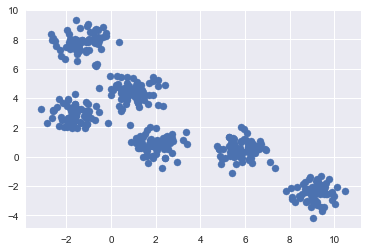

In [39]:
# Method to see what data looks like with different numbers of clusters
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=6,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [40]:
# Note there are no categorical variables

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [56]:
credit.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [60]:
scaling = MinMaxScaler()
scaling.fit(credit)
data_transformed = scaling.transform(credit)

In [61]:
# Sum of squared distances from theoretical centers resulting from the number of centers.  If k is too high
# the distance between group centers is too high and if they are too low, data will be over fit.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

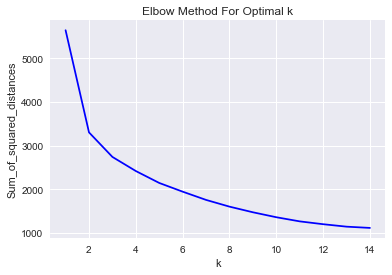

In [83]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### It looks like the optimal number of clusters is between 3 and 6.

# Testing with K Means

In [71]:
# Try plotting with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

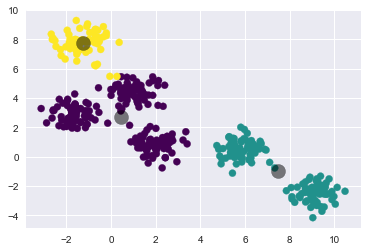

In [85]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

##### It looks like 6 centers would be better

In [69]:
# Change clusters to 6
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

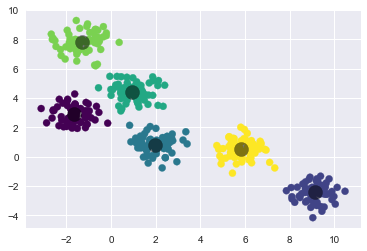

In [70]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [72]:
print(centers)

[[-1.63449575  2.87862014]
 [ 9.1503528  -2.43150064]
 [ 1.97132986  0.81399817]
 [ 0.96423313  4.41793436]
 [-1.27880609  7.79984381]
 [ 5.8230229   0.49601923]]


### Expectation Maximization- Running K Means Until Optimal Number of Centers is Reached

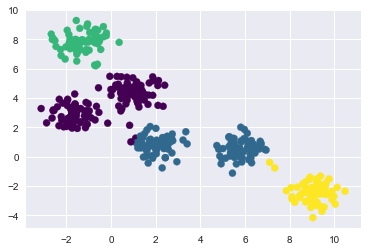

In [109]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### This is close, but for this data set, the elbow method seems to have worked better.